In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.cluster import KMeans
from skimage.filters.rank import mean
from skimage.filters import threshold_otsu, threshold_niblack, threshold_sauvola, threshold_mean

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Kmeans

In [3]:
def load_image(path):
    img = imread(path)
    if len(img.shape) == 3:
        img = img[:,:,0]
    return img

In [4]:
path = 'ultrassound/cropped/'
imgs = sorted(os.listdir(path))
imgs[:5]

['1100208028.bmp',
 '1100209013.bmp',
 '1100210009.bmp',
 '1100210637.bmp',
 '1100211010.bmp']

In [5]:
img_teste = load_image(path + imgs[4])

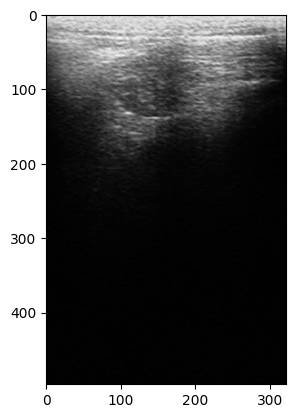

In [6]:
plt.imshow(img_teste, cmap='gray')

In [7]:
img_reshape = img_teste.reshape(-1,1)
img_reshape.shape

(160531, 1)

In [8]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(img_reshape)
    wcss.append(kmeans.inertia_)

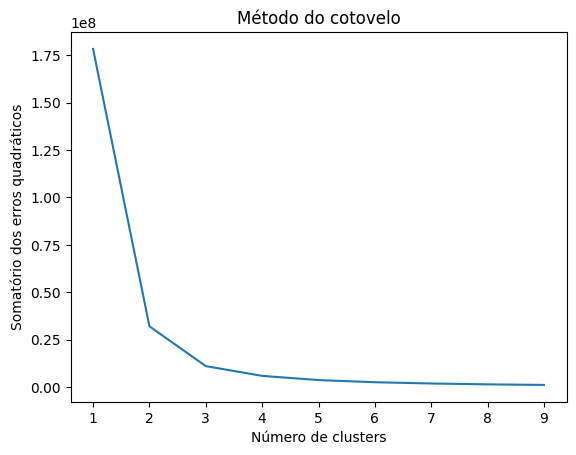

In [9]:
plt.plot(range(1, 10), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Somatório dos erros quadráticos')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans2 = KMeans(n_clusters=3)
kmeans.fit(img_reshape)
kmeans2.fit(img_reshape)

KMeans(n_clusters=3)

In [11]:
result =(kmeans.labels_.reshape(img_teste.shape))
cluster1 = result == 0
cluster2 = result == 1

In [12]:
result2 =(kmeans2.labels_.reshape(img_teste.shape))
cluster3 = result2 == 0
cluster4 = result2 == 1
cluster5 = result2 == 2

Text(0.5, 1.0, 'Resultado')

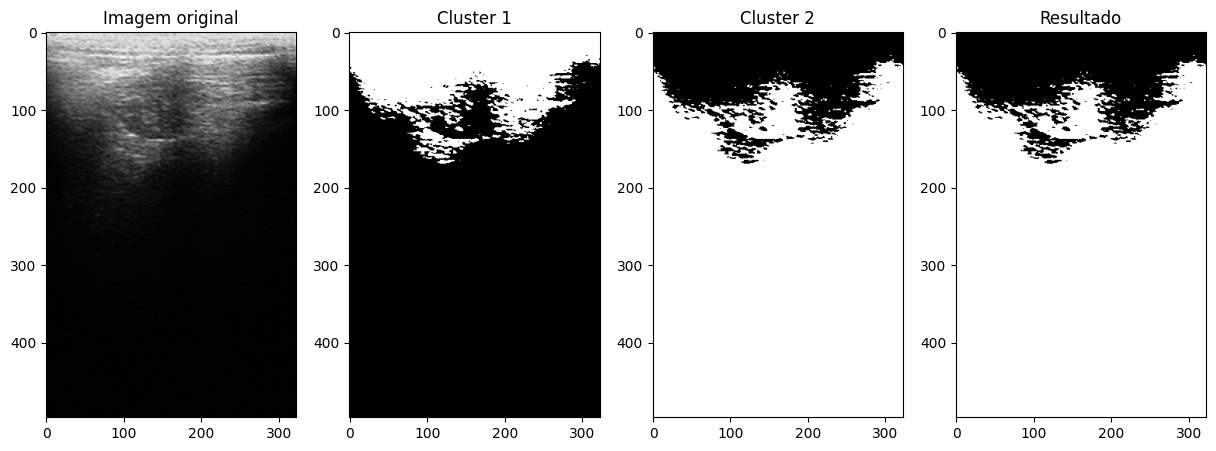

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(img_teste, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(cluster1, cmap='gray')
ax[1].set_title('Cluster 1')
ax[2].imshow(cluster2, cmap='gray')
ax[2].set_title('Cluster 2')
ax[3].imshow(result, cmap='gray')
ax[3].set_title('Resultado')

Text(0.5, 1.0, 'Resultado')

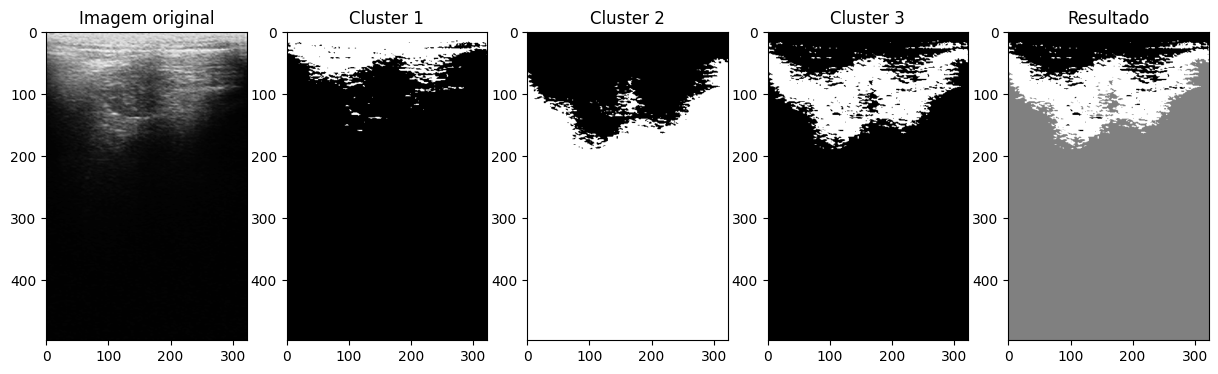

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
ax[0].imshow(img_teste, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(cluster3, cmap='gray')
ax[1].set_title('Cluster 1')
ax[2].imshow(cluster4, cmap='gray')
ax[2].set_title('Cluster 2')
ax[3].imshow(cluster5, cmap='gray')
ax[3].set_title('Cluster 3')
ax[4].imshow(result2, cmap='gray')
ax[4].set_title('Resultado')

In [15]:
img_media = mean(img_teste, np.ones((6,6)))

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans2 = KMeans(n_clusters=3)
kmeans.fit(img_media.reshape(-1,1))
kmeans2.fit(img_media.reshape(-1,1))

KMeans(n_clusters=3)

In [17]:
result =(kmeans.labels_.reshape(img_media.shape))
cluster1 = result == 0
cluster2 = result == 1

In [18]:
result2 =(kmeans2.labels_.reshape(img_media.shape))
cluster3 = result2 == 0
cluster4 = result2 == 1
cluster5 = result2 == 2

Text(0.5, 1.0, 'Resultado')

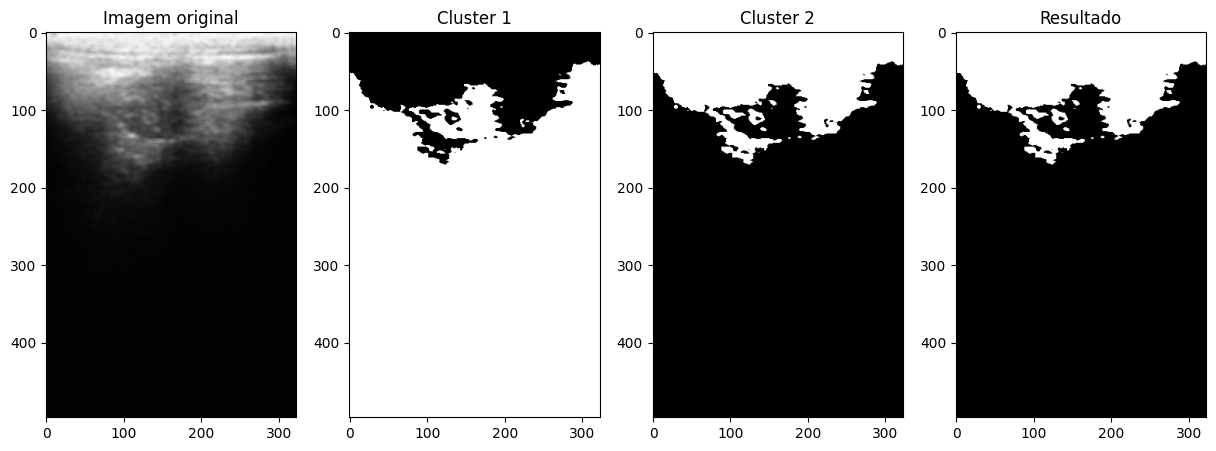

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(img_media, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(cluster1, cmap='gray')
ax[1].set_title('Cluster 1')
ax[2].imshow(cluster2, cmap='gray')
ax[2].set_title('Cluster 2')
ax[3].imshow(result, cmap='gray')
ax[3].set_title('Resultado')

Text(0.5, 1.0, 'Resultado')

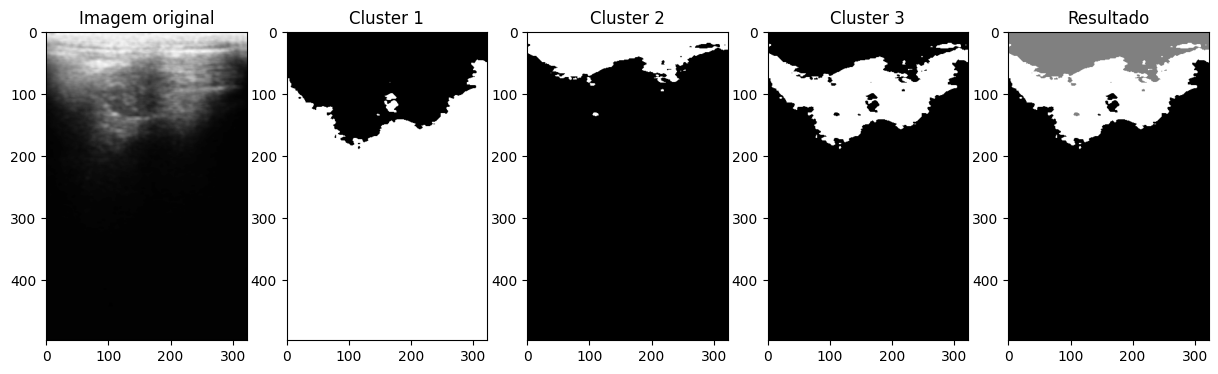

In [20]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
ax[0].imshow(img_media, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(cluster3, cmap='gray')
ax[1].set_title('Cluster 1')
ax[2].imshow(cluster4, cmap='gray')
ax[2].set_title('Cluster 2')
ax[3].imshow(cluster5, cmap='gray')
ax[3].set_title('Cluster 3')
ax[4].imshow(result2, cmap='gray')
ax[4].set_title('Resultado')

# Niblack, otsu, sauvola e mean

In [21]:
img_niblack = img_teste > threshold_niblack(img_teste)
img_niblack_media = img_media > threshold_niblack(img_media)

In [22]:
img_otsu = img_teste > threshold_otsu(img_teste)
img_otsu_media = img_media > threshold_otsu(img_media)

In [23]:
img_sauvola = img_teste > threshold_sauvola(img_teste)
img_sauvola_media = img_media > threshold_sauvola(img_media)

In [24]:
img_mean = img_teste > threshold_mean(img_teste)
img_mean_media = img_media > threshold_mean(img_media)

Text(0.5, 1.0, 'Mean')

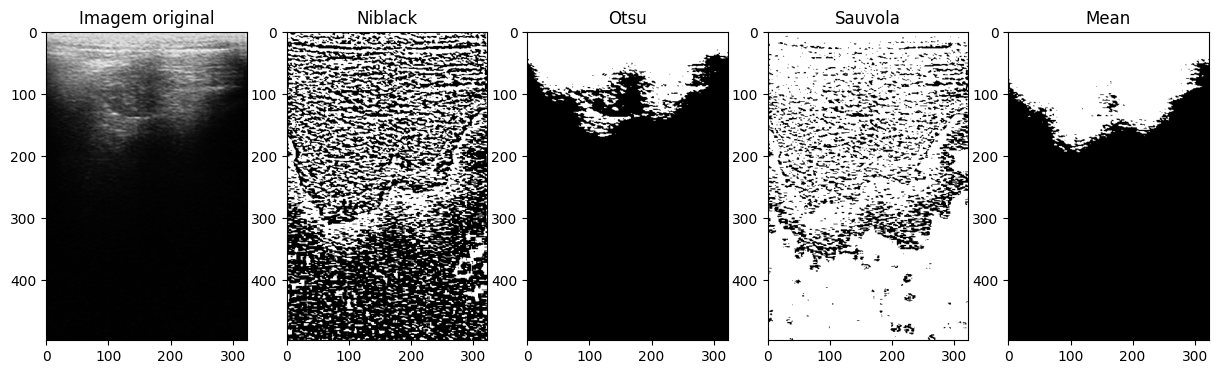

In [25]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
ax[0].imshow(img_teste, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(img_niblack, cmap='gray')
ax[1].set_title('Niblack')
ax[2].imshow(img_otsu, cmap='gray')
ax[2].set_title('Otsu')
ax[3].imshow(img_sauvola, cmap='gray')
ax[3].set_title('Sauvola')
ax[4].imshow(img_mean, cmap='gray')
ax[4].set_title('Mean')


Text(0.5, 1.0, 'Mean')

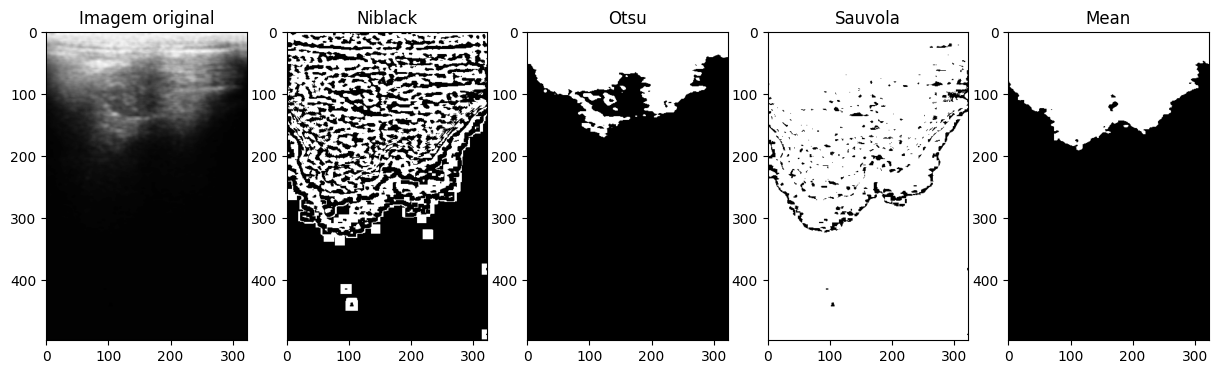

In [26]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
ax[0].imshow(img_media, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(img_niblack_media, cmap='gray')
ax[1].set_title('Niblack')
ax[2].imshow(img_otsu_media, cmap='gray')
ax[2].set_title('Otsu')
ax[3].imshow(img_sauvola_media, cmap='gray')
ax[3].set_title('Sauvola')
ax[4].imshow(img_mean_media, cmap='gray')
ax[4].set_title('Mean')